### Student Information
Name: 黃乙鐘

Student ID: 109062807

GitHub ID: arthurich

### Instructions


1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

---

In [4]:
#confirm we're using the right python version
import sys
print(sys.version)

3.9.6 (v3.9.6:db3ff76da1, Jun 28 2021, 11:49:53) 
[Clang 6.0 (clang-600.0.57)]


In [5]:
# auto reload for speedy dvp
%load_ext autoreload
%autoreload 2

In [6]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [7]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

In [8]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [9]:
# add category to the dataframe
#@ add new column to the X
X['category'] = twenty_train.target

In [10]:
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

#lambda: to call a function; especially from another files, dmh is a set of function

### Exercise 2 (take home)


In [11]:
#Answer here
X.head(4)

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [9]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [10]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

## Answer here:
.isnull funtion can get True from rows A, B and E, 
meaning it can detect np.nan in A, None in E and the blank in B.
#For rows C and D, their values 'NaN' and 'None' '' are considered strings.

---

In [11]:
X_sample = X.sample(n=1000) #random state

### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [12]:
# Answer here
# X_sample stores 1000 elements randomly picked from the original X dataframe.
# Still, X keeps not changed if we checked the first four rows.
X.head(4)


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian

---

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

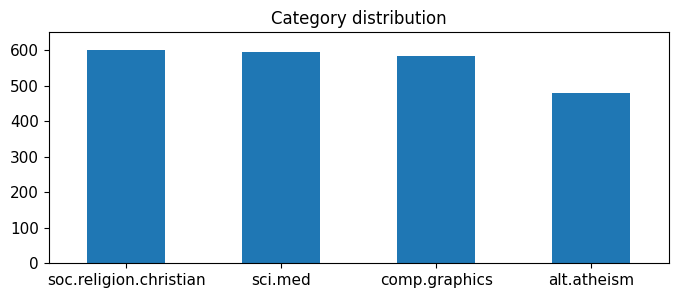

In [15]:
print(X.category_name.value_counts())

# plot barchart for X
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        #Y軸刻度，0 到 650
                                    rot = 0, fontsize = 11, figsize = (8,3))

soc.religion.christian    281
sci.med                   260
comp.graphics             237
alt.atheism               222
Name: category_name, dtype: int64


<AxesSubplot: title={'center': 'Category distribution'}>

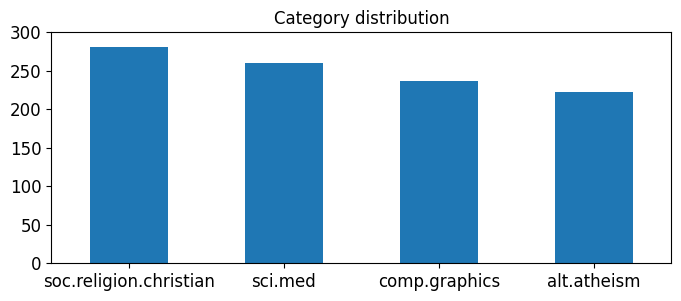

In [16]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300],  #y軸刻度，0 到 100
                                           rot = 0, fontsize = 12, figsize = (8,3))

---

---

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

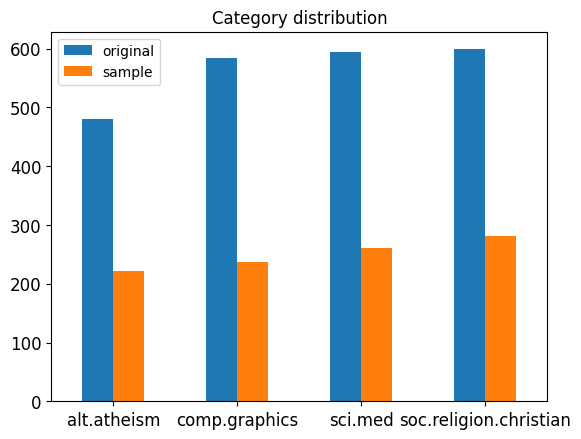

In [17]:
# Answer here
df = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1, sort=True)
df.columns = ["original", "sample"]

df.plot(kind = 'bar',
        title="Category distribution",
        rot = 0, fontsize = 12)
plt.show()

---

In [18]:
import nltk

In [19]:
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

---

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts[0])

#below result (0...) -> 0 means the first record (or array[0]), 14888 means a term (in this case, 'from') and it appers '1' time in the document. 
#  term#8696 (term index#) shows 4 times in the doc

#below is the explanation
# (doc#, term index)  term_freq

  (0, 14887)	1
  (0, 29022)	1
  (0, 8696)	4
  (0, 4017)	2
  (0, 33256)	2
  (0, 21661)	3
  (0, 9031)	3
  (0, 31077)	1
  (0, 9805)	2
  (0, 17366)	1
  (0, 32493)	4
  (0, 16916)	2
  (0, 19780)	2
  (0, 17302)	2
  (0, 23122)	1
  (0, 25663)	1
  (0, 16881)	1
  (0, 16082)	1
  (0, 23915)	1
  (0, 32142)	5
  (0, 33597)	2
  (0, 20253)	1
  (0, 587)	1
  (0, 12051)	1
  (0, 5201)	1
  :	:
  (0, 25361)	1
  (0, 25337)	1
  (0, 12833)	2
  (0, 5195)	1
  (0, 27836)	1
  (0, 18474)	1
  (0, 32270)	1
  (0, 9932)	1
  (0, 15837)	1
  (0, 32135)	1
  (0, 17556)	1
  (0, 4378)	1
  (0, 26175)	1
  (0, 9338)	1
  (0, 33572)	1
  (0, 31915)	1
  (0, 177)	2
  (0, 2326)	2
  (0, 3062)	1
  (0, 35416)	1
  (0, 20459)	1
  (0, 14085)	1
  (0, 3166)	1
  (0, 12541)	1
  (0, 230)	1


In [21]:
analyze = count_vect.build_analyzer()
#a analyzer to tokenize and  produce word freq.
analyze("I am craving for a hawaiian pizza right now") 
#it will remove stopwords like i, a, am etc. and create n-gram (when n =1, then unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

---

---

Now let us look at the term-document matrix we built above.

In [22]:
count_vect.get_feature_names_out()[14168] #get the term of 14168

'femine'

In [23]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [24]:
X_counts.shape

(2257, 35788)

In [25]:
X_counts[4, 0:100].toarray() #show the 4th record (doc), and first 100 terms


array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [26]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray() #5 records (doc), and first 100 terms
#if it's all 0 means no terms appear in the doc

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [27]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

---

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [28]:
# Answer here
a=np.where(X_counts[4, 0:100].toarray() == 1)
print(count_vect.get_feature_names_out()[a[1][1]])

01


---

In [29]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [30]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [31]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

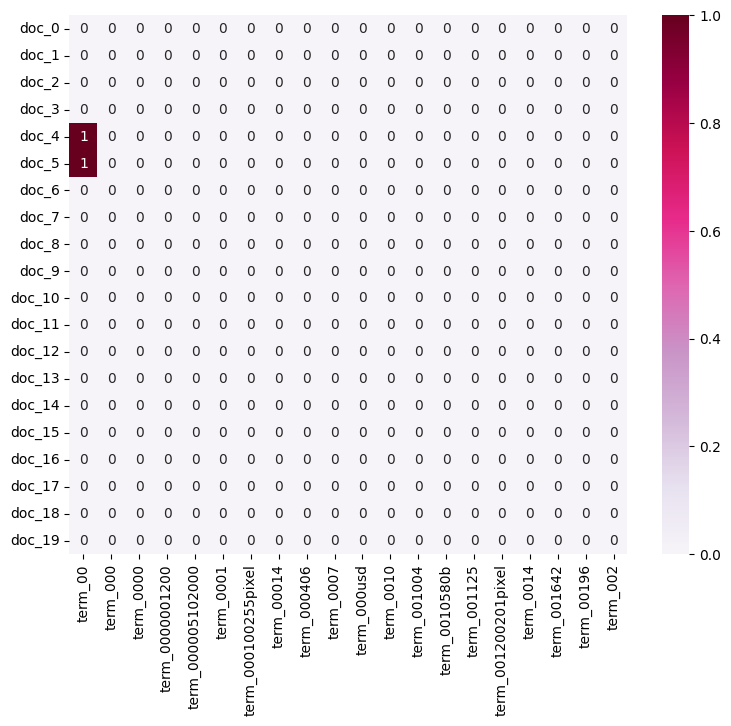

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt #add by arthur


#get data to draw in a dataframe
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

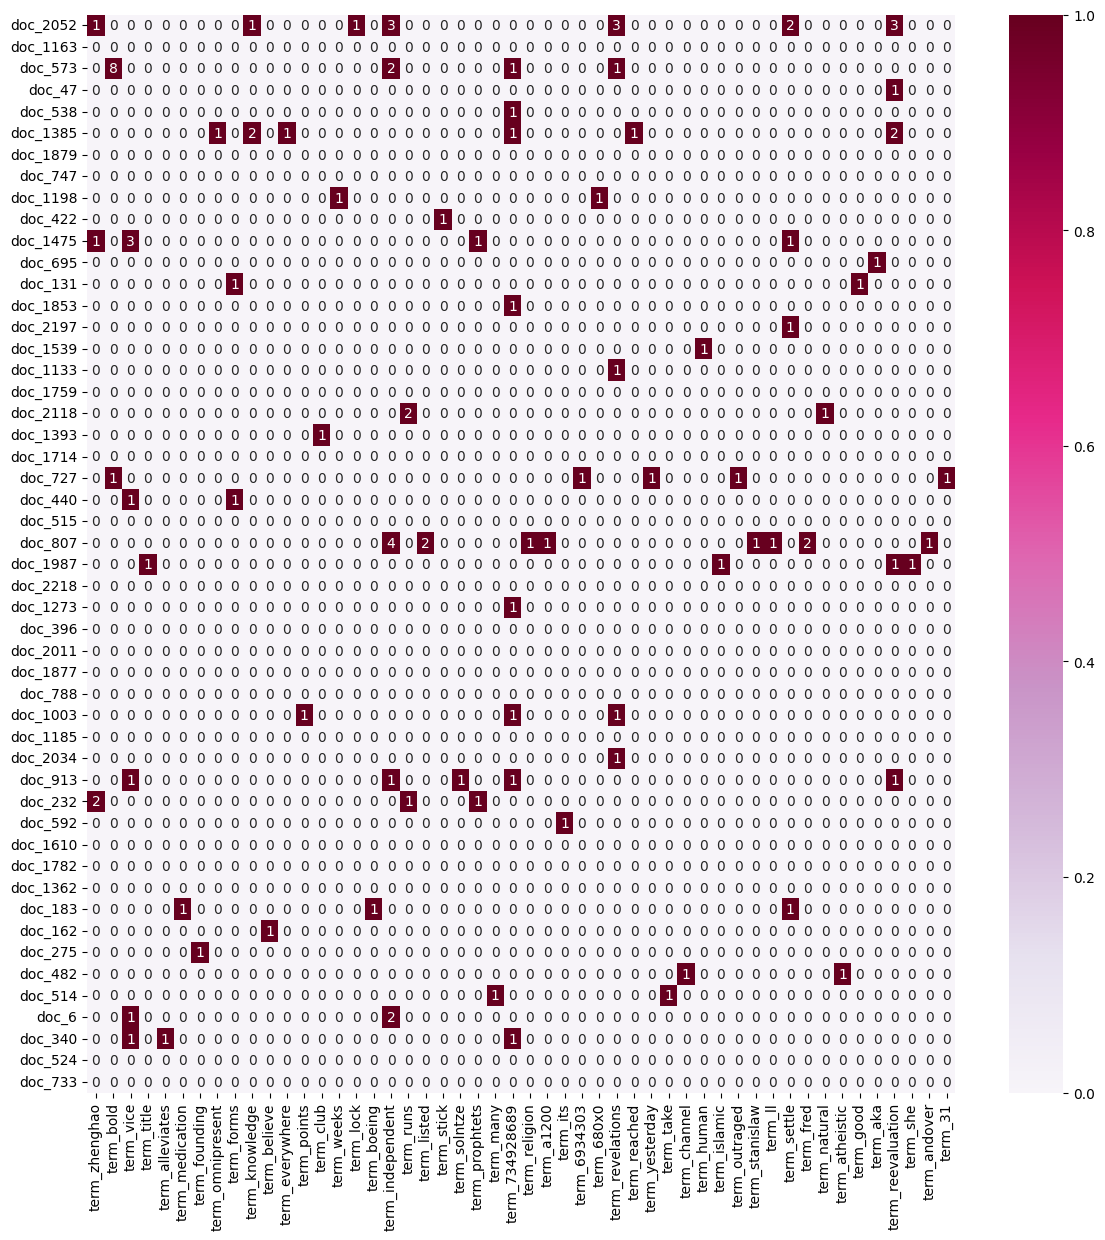

In [33]:
# Answer here
# We could remove all zero data and only show non-zero data 

import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from random import sample

# import warnings filter
from warnings import simplefilter
# ignore all future warnings, here for get_feature_names()
simplefilter(action='ignore', category=FutureWarning)
    
X_sample_50 = X.sample(50)
count_vect = CountVectorizer()
X_sample_50_count = count_vect.fit_transform(X_sample_50.text)[:50,:50]
count_name = sample(count_vect.get_feature_names(), 50 )


plot_x = ["term_"+str(i) for i in count_name]
plot_y = ["doc_"+ str(i) for i in list(X_sample_50.index)]
plot_z = X_sample_50_count.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
#we need to get samples before df or we wait a long long long time...
plt.figure(figsize=(14, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

---

---

In [34]:
from sklearn.decomposition import PCA

In [35]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [36]:
X_reduced.shape

(2257, 2)

In [37]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

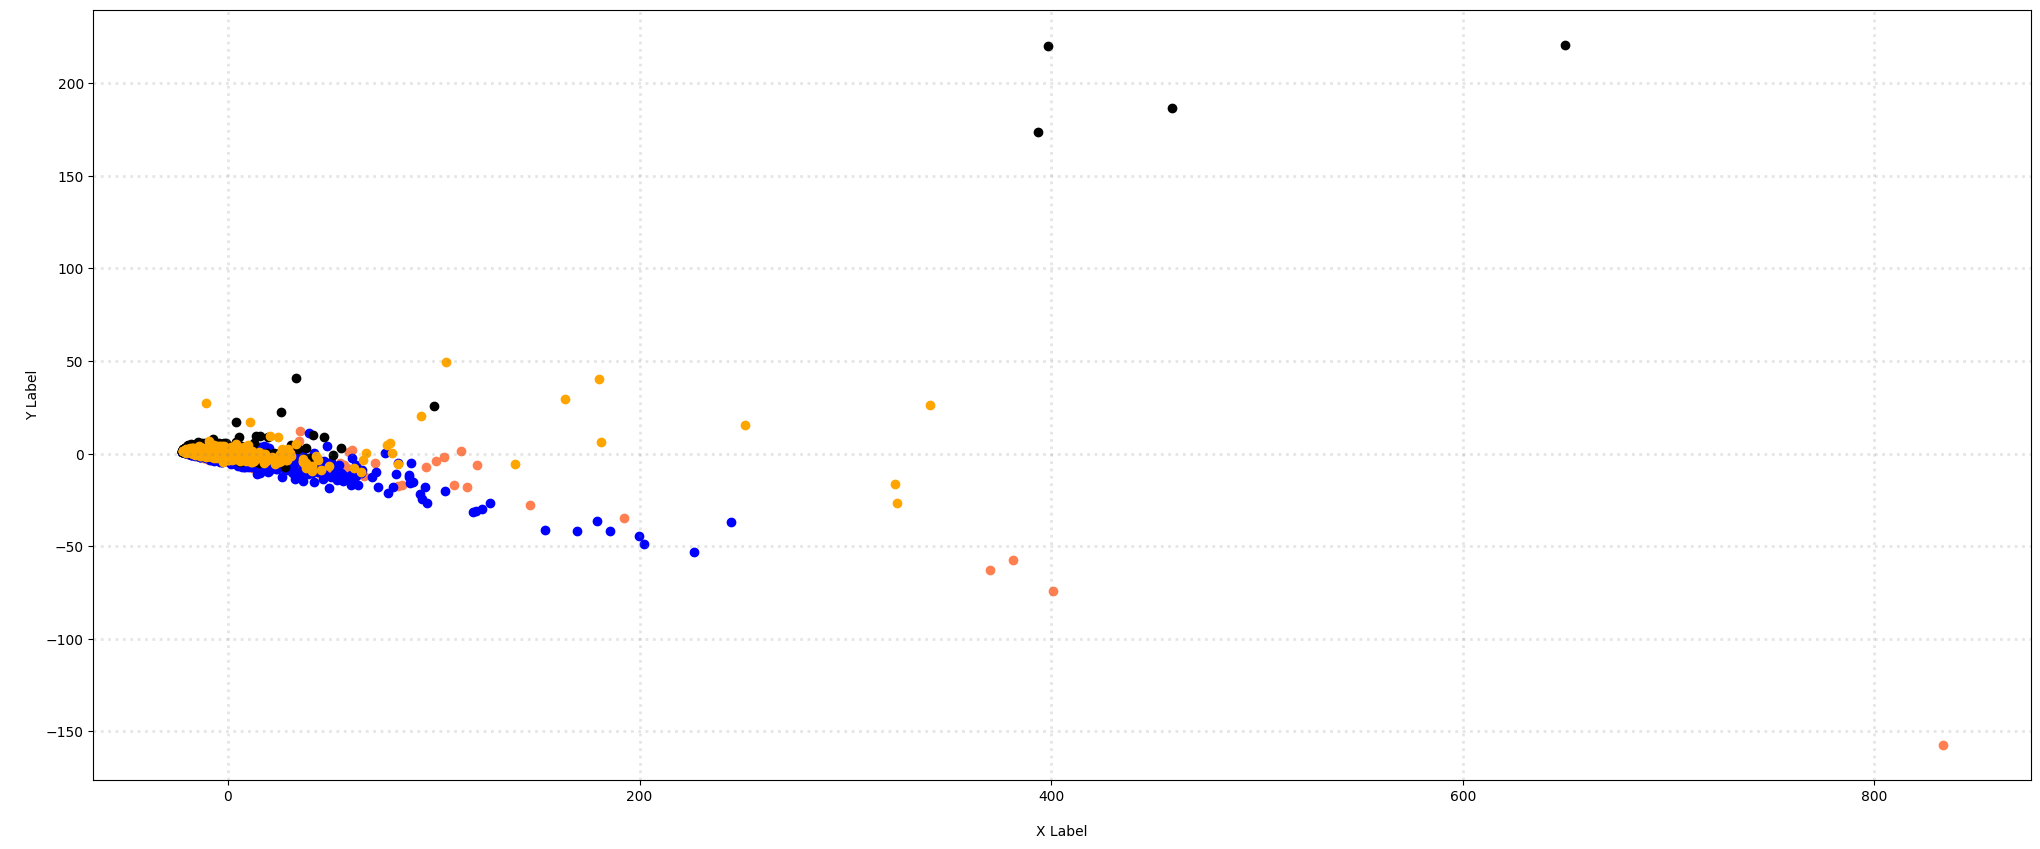

In [38]:

col = ['coral', 'blue', 'black', 'orange']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

---

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [39]:
# Answer here
from sklearn.decomposition import PCA
# Answer here
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape
# Projecting the data into 3D space

(2257, 3)

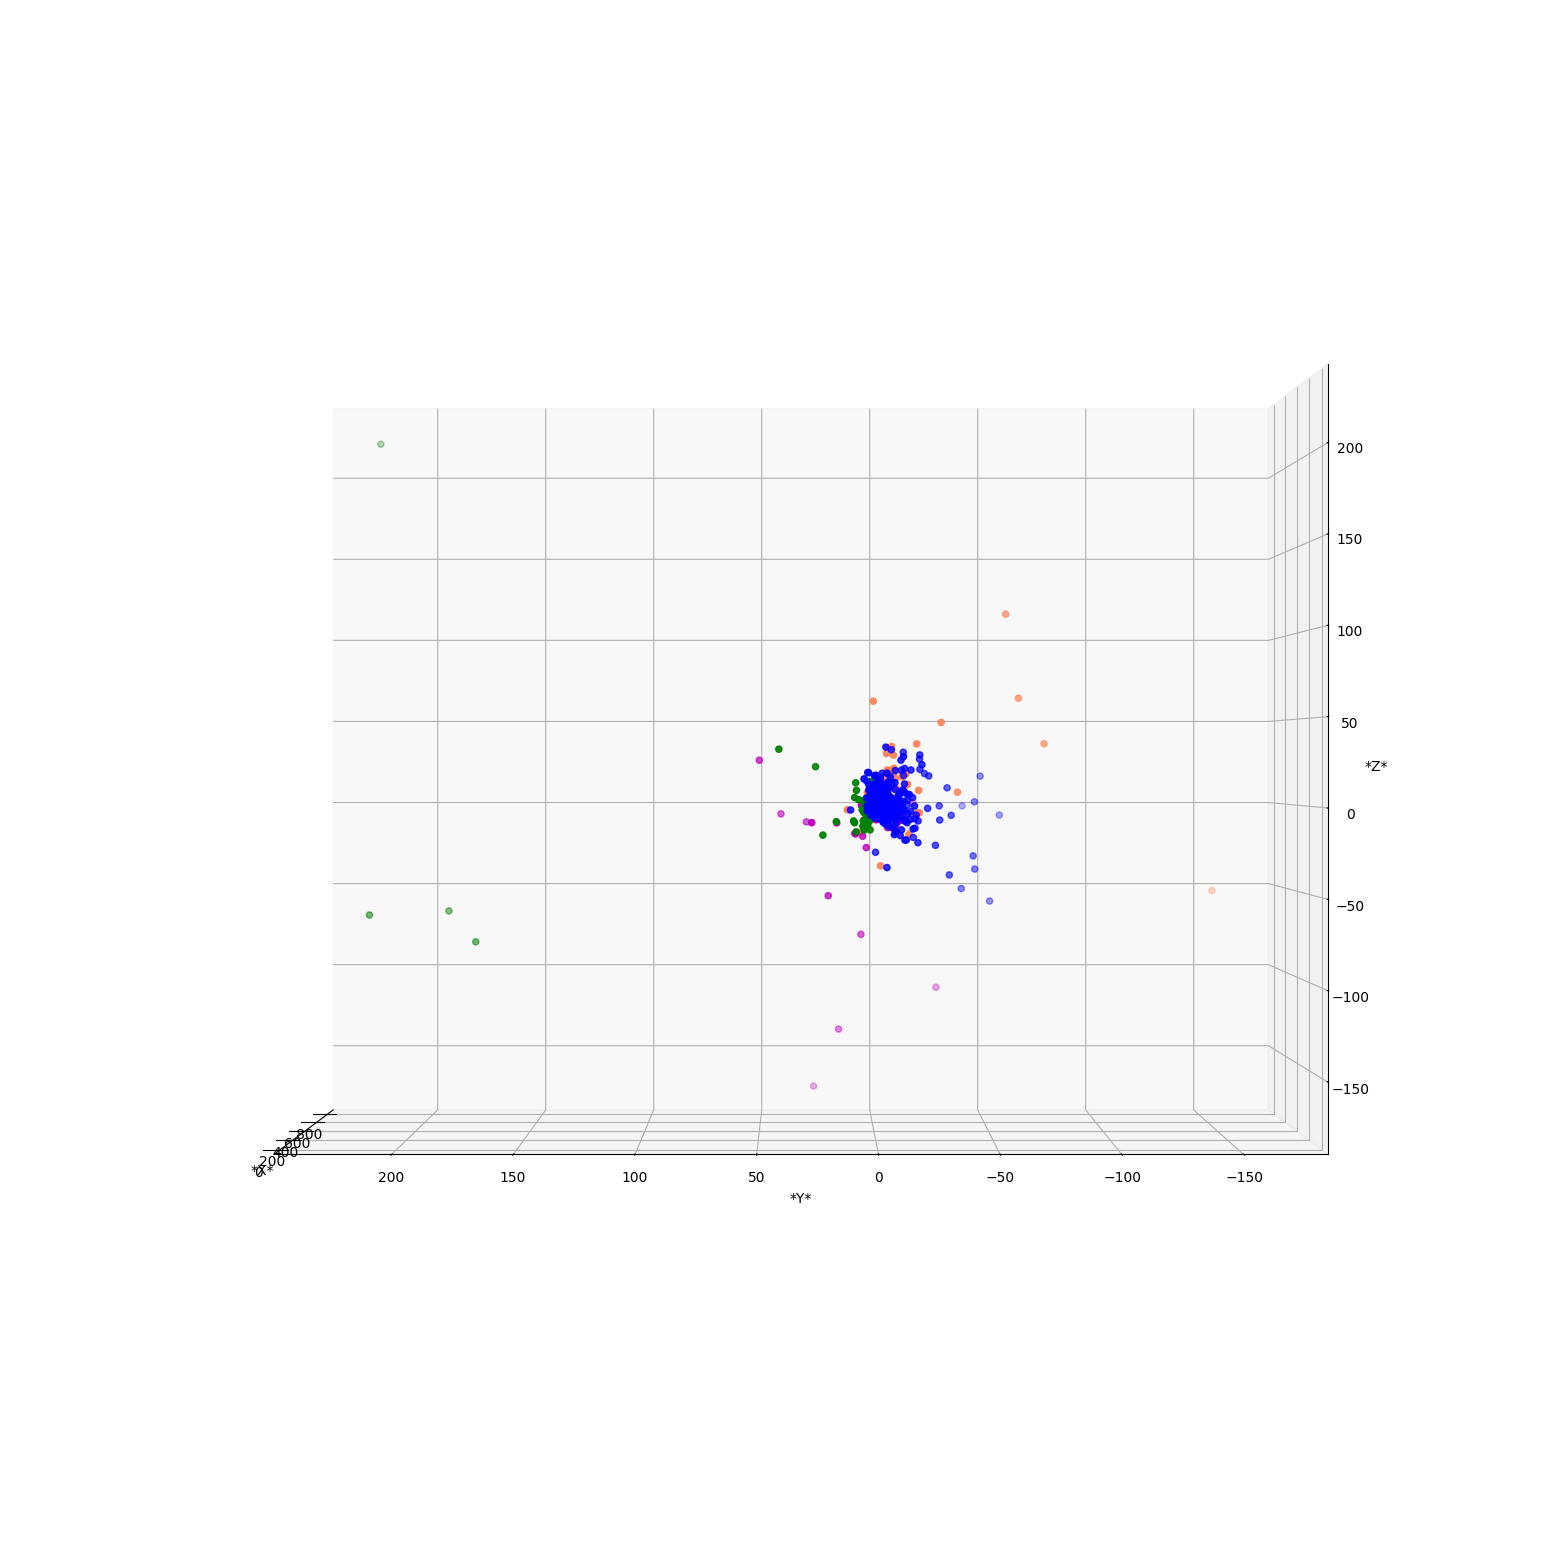

In [40]:
col = ['coral', 'blue', 'green', 'm']

# plot
fig = plt.figure(figsize = (30,20))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\n*X*')
ax.set_ylabel('\n*Y*')
ax.set_zlabel('\n*Z*')
elev = 0.0
azim = 180.0
ax.view_init(elev, azim)
plt.show()

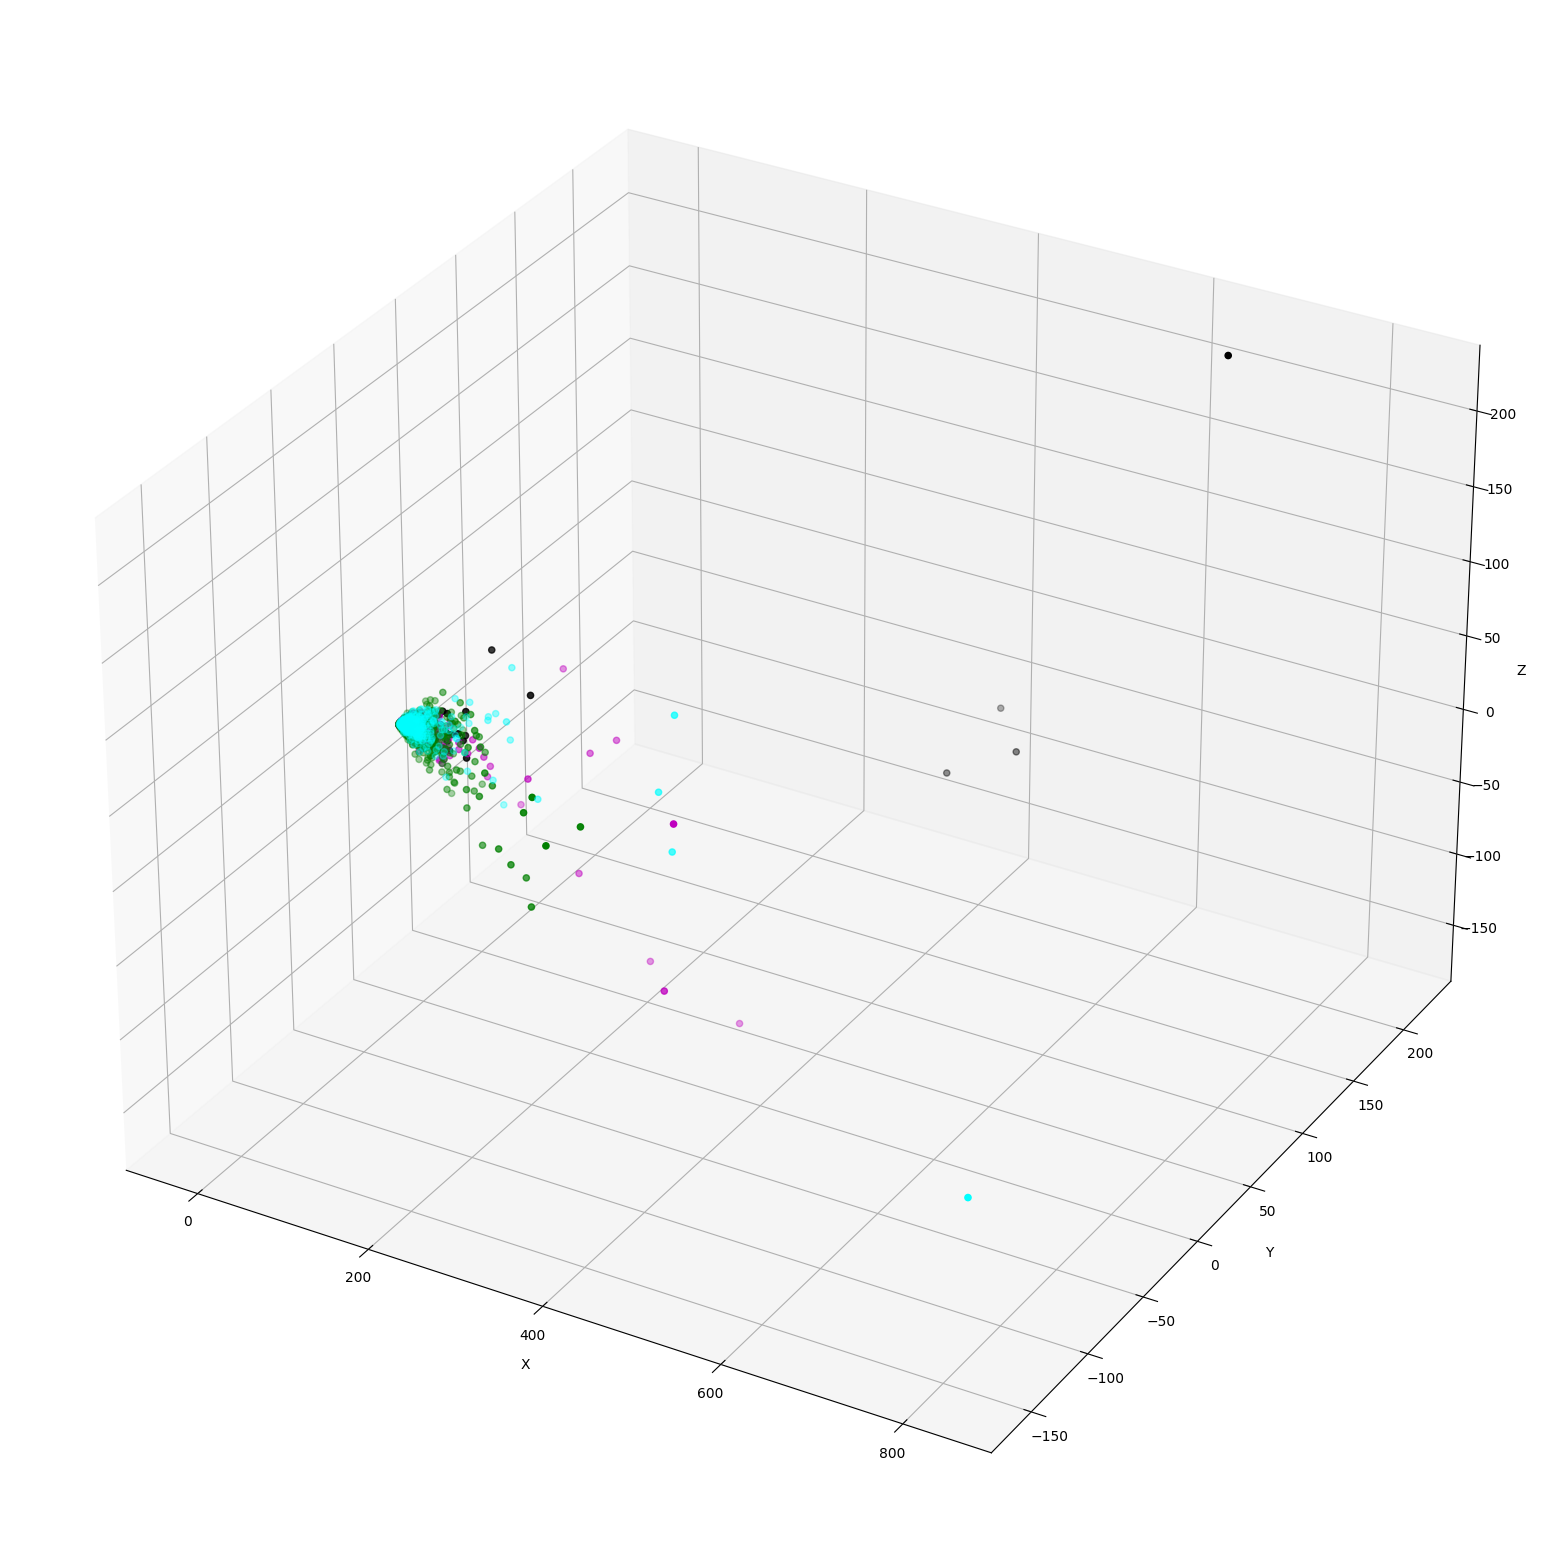

In [41]:
col = ['cyan', 'green', 'black', 'm']

# plot
fig = plt.figure(figsize = (30,20))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xslim = X_reduced[X['category_name'] == category].T[0]
    yslim = X_reduced[X['category_name'] == category].T[1]
    zslim = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xslim, yslim, zslim, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX')
ax.set_ylabel('\nY')
ax.set_zlabel('\nZ')


plt.show()

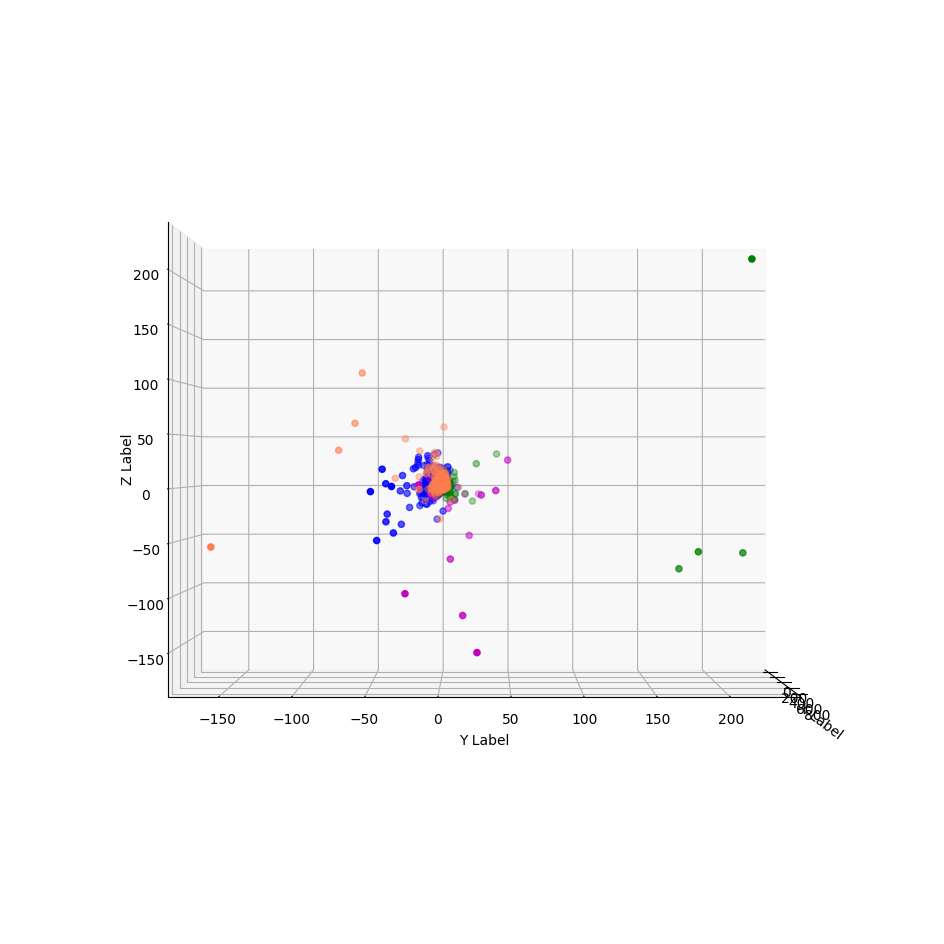

In [42]:
col = ['coral', 'blue', 'green', 'm']

# plot
fig = plt.figure(figsize = (30,12))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xslim = X_reduced[X['category_name'] == category].T[0]
    yslim = X_reduced[X['category_name'] == category].T[1]
    zslim = X_reduced[X['category_name'] == category].T[2]
   
    ax.scatter(xslim, yslim, zslim, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

elev = 0.0
azim = 0.0
ax.view_init(elev, azim)
plt.show()

## Wow! It looks great!

---

In [43]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [44]:
import numpy as np #add by az
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [45]:
term_frequencies[0] #sum of first term

134

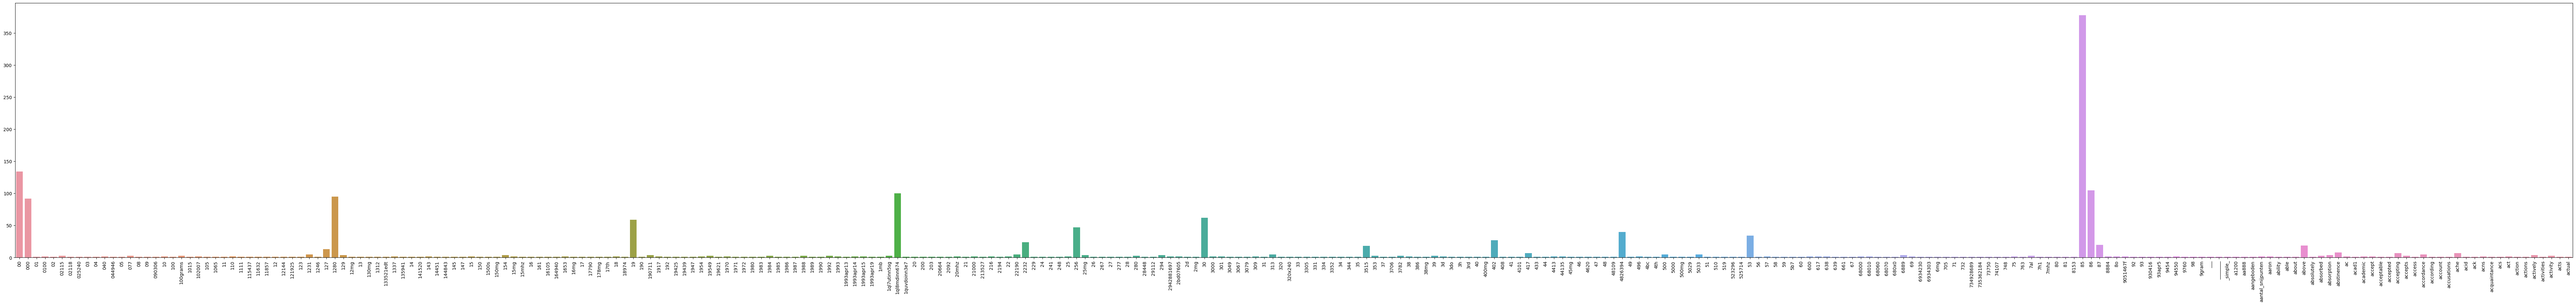

In [46]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [47]:
# Answer here
#prepare term freq here
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [48]:
#use plotly as suggested
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names_out()[:300],
             y=term_frequencies[:300])
#fig.show() may return blank only
#we add this for rendering
import plotly.io as pio
pio.renderers.default='notebook'
fig.show("notebook")

---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [49]:
# Answer here
df = pd.DataFrame(list(zip(count_vect.get_feature_names(), list(term_frequencies))), 
                  columns=["fea", "fre"]
)
df = df.sample(300)
fig = px.bar(df, x="fea", y="fre")
fig.show()


---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [50]:
# Answer here
df = pd.DataFrame(list(zip(count_vect.get_feature_names(), list(term_frequencies))), 
                  columns=["fea", "fre"]
)
df = df.sort_values(by="fre")[::-1][:200]
fig = px.bar(df, x="fea", y="fre")
fig.show()


---

In [51]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

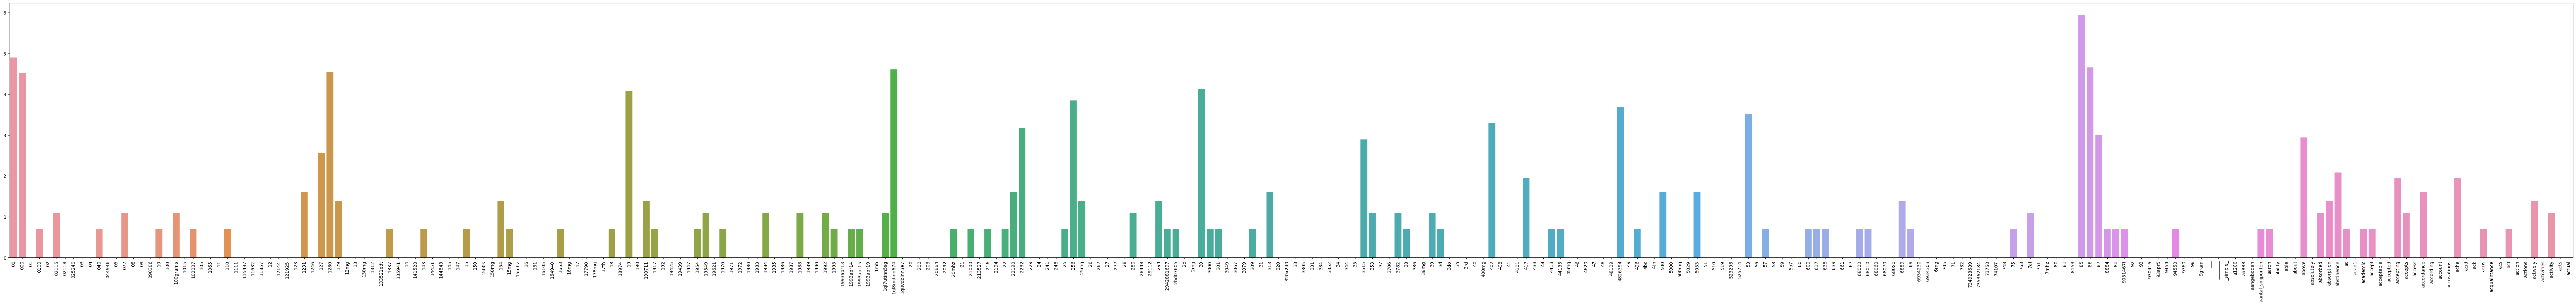

In [52]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

---

In [53]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [54]:
mlb = preprocessing.LabelBinarizer()

In [55]:
mlb.fit(X.category)

LabelBinarizer()

In [56]:
X['bin_category'] = mlb.transform(X['category']).tolist()

---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [57]:
# Answer here: yes it works!
from sklearn import decomposition, dummy, metrics, pipeline,preprocessing 

mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

# PART II New Dataset

In [58]:
#load data as csv
amazon_data = pd.read_csv("sentiment labelled sentences/amazon_cells_labelled.txt", sep="\t", names=["text", "label"])
imdb_data = pd.read_csv("sentiment labelled sentences/imdb_labelled.txt", sep="\t", names=["text", "label"])
yelp_data = pd.read_csv("sentiment labelled sentences/yelp_labelled.txt", sep="\t", names=["text", "label"])

In [59]:
#add data to columns
amazon_data['source'] = "amazon"
imdb_data['source'] = "imdb"
yelp_data['source'] = "yelp"

In [60]:
#combining all data together
data = amazon_data.append((imdb_data, yelp_data), ignore_index = True)

#check  multiple positions
data.text[168]

"doesn't last long."

In [61]:
data

text  label  source
0     So there is no way for me to plug it in here i...      0  amazon
1                           Good case, Excellent value.      1  amazon
2                                Great for the jawbone.      1  amazon
3     Tied to charger for conversations lasting more...      0  amazon
4                                     The mic is great.      1  amazon
...                                                 ...    ...     ...
2743  I think food should have flavor and texture an...      0    yelp
2744                           Appetite instantly gone.      0    yelp
2745  Overall I was not impressed and would not go b...      0    yelp
2746  The whole experience was underwhelming, and I ...      0    yelp
2747  Then, as if I hadn't wasted enough of my life ...      0    yelp

[2748 rows x 3 columns]

## 4. Data Mining using Pandas
## 4.1 missing value

In [62]:
#check missing data
data.isnull().apply(lambda x: dmh.check_missing_values(x))

text                               label  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source  
0  The amoung of missing records is:   
1                                   0

In [63]:
sum(data.duplicated('text'))

17

In [64]:
#check duplicated text
data.text[data.duplicated('text')]

285                                         Great phone!.
407                                          Works great.
524                                         Works great!.
543                               Don't buy this product.
744     If you like a loud buzzing to override all you...
748                                         Does not fit.
778                                 This is a great deal.
792                                          Great Phone.
892                      Excellent product for the price.
896                                          Great phone.
1165                     Definitely worth checking out.  
1387                                   Not recommended.  
1590                                              10/10  
2562                                   I love this place.
2564                               The food was terrible.
2591                                     I won't be back.
2594                    I would not recommend this place.
Name: text, dt

In [65]:
#drop duplicated ones and check
data.drop_duplicates(keep=False, inplace=True)
sum(data.duplicated('text'))

0

## 5. Data Preprocessing
## 5.1 data distribution

In [66]:
#sample a sub set of data
data_sample = data.sample(n=1000)
len(data_sample)

1000

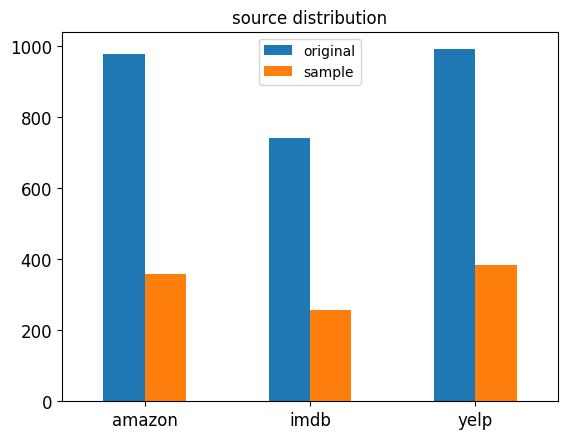

In [67]:
#plot the number of each source of original and sample
df = pd.concat([data.source.value_counts(), data_sample.source.value_counts()], axis=1, sort=True)
df.columns = ["original", "sample"]

df.plot(kind = 'bar',
        title="source distribution",
        rot = 0, fontsize = 12)
plt.show()

## 5.2 feature creation


In [68]:

#seprate each word
data['unigrams'] = data['text'].apply(lambda x: dmh.tokenize_text(x))
data

text  label  source  \
0     So there is no way for me to plug it in here i...      0  amazon   
1                           Good case, Excellent value.      1  amazon   
2                                Great for the jawbone.      1  amazon   
3     Tied to charger for conversations lasting more...      0  amazon   
4                                     The mic is great.      1  amazon   
...                                                 ...    ...     ...   
2743  I think food should have flavor and texture an...      0    yelp   
2744                           Appetite instantly gone.      0    yelp   
2745  Overall I was not impressed and would not go b...      0    yelp   
2746  The whole experience was underwhelming, and I ...      0    yelp   
2747  Then, as if I hadn't wasted enough of my life ...      0    yelp   

                                               unigrams  
0     [So, there, is, no, way, for, me, to, plug, it...  
1                  [Good, case, ,, Excellent, value, .]  
2                         [Great, for, the, jawbone, .]  
3     [Tied, to, charger, for, conversations, lastin...  
4                              [The, mic, is, great, .]  
...                                                 ...  
2743  [I, think, food, should, have, flavor, and, te...  
2744                     [Appetite, instantly, gone, .]  
2745  [Overall, I, was, not, impressed, and, would, ...  
2746  [The, whole, experience, was, underwhelming, ,...  
2747  [Then, ,, as, if, I, had, n't, wasted, enough,...  

[2714 rows x 4 columns]

## 5.3 feature subset selection

In [69]:
#analyze text frequency
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.text)
data_counts.shape

(2714, 5153)

In [70]:
#obtain the feature name
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

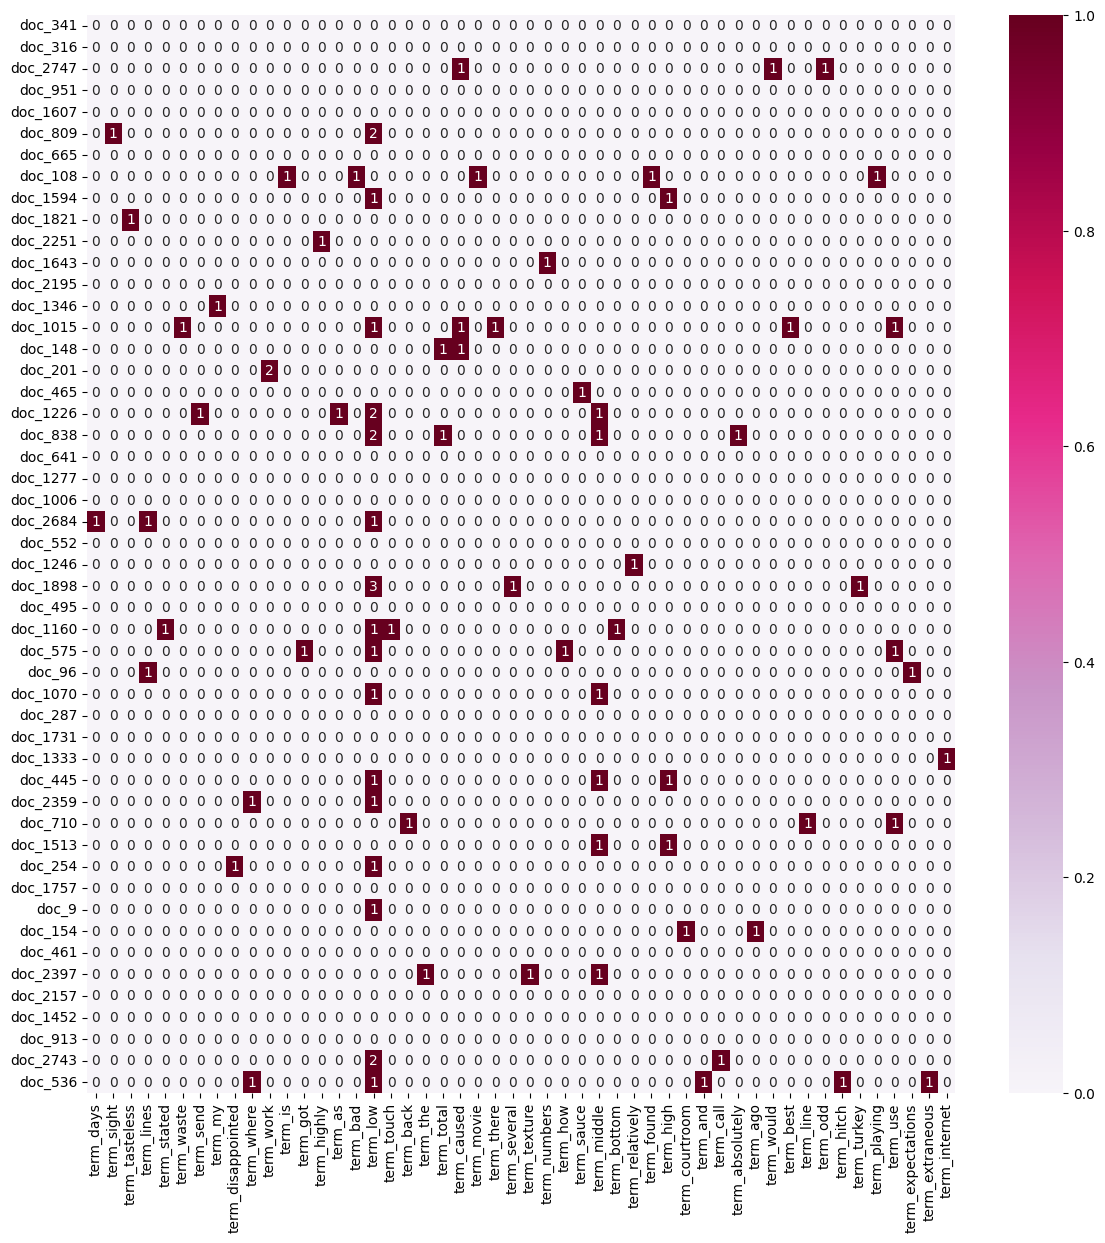

In [71]:
#sample 50 data to plot heatmap

data_sample_50 = data.sample(50)
data_sample_50_count = count_vect.fit_transform(data_sample_50.text)[:50,:50]
data_count_name = sample(count_vect.get_feature_names(), 50 )


plot_x = ["term_"+str(i) for i in data_count_name]
plot_y = ["doc_"+ str(i) for i in list(data_sample_50.index)]
plot_z = data_sample_50_count.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# df_todraw_resample = df_todraw.sample(300) #must sample before df or it'll take forever
plt.figure(figsize=(14, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## 5.4 dimensionality reduction

In [72]:
#use PCA to turn data into 2d
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
data_reduced.shape

(2714, 2)

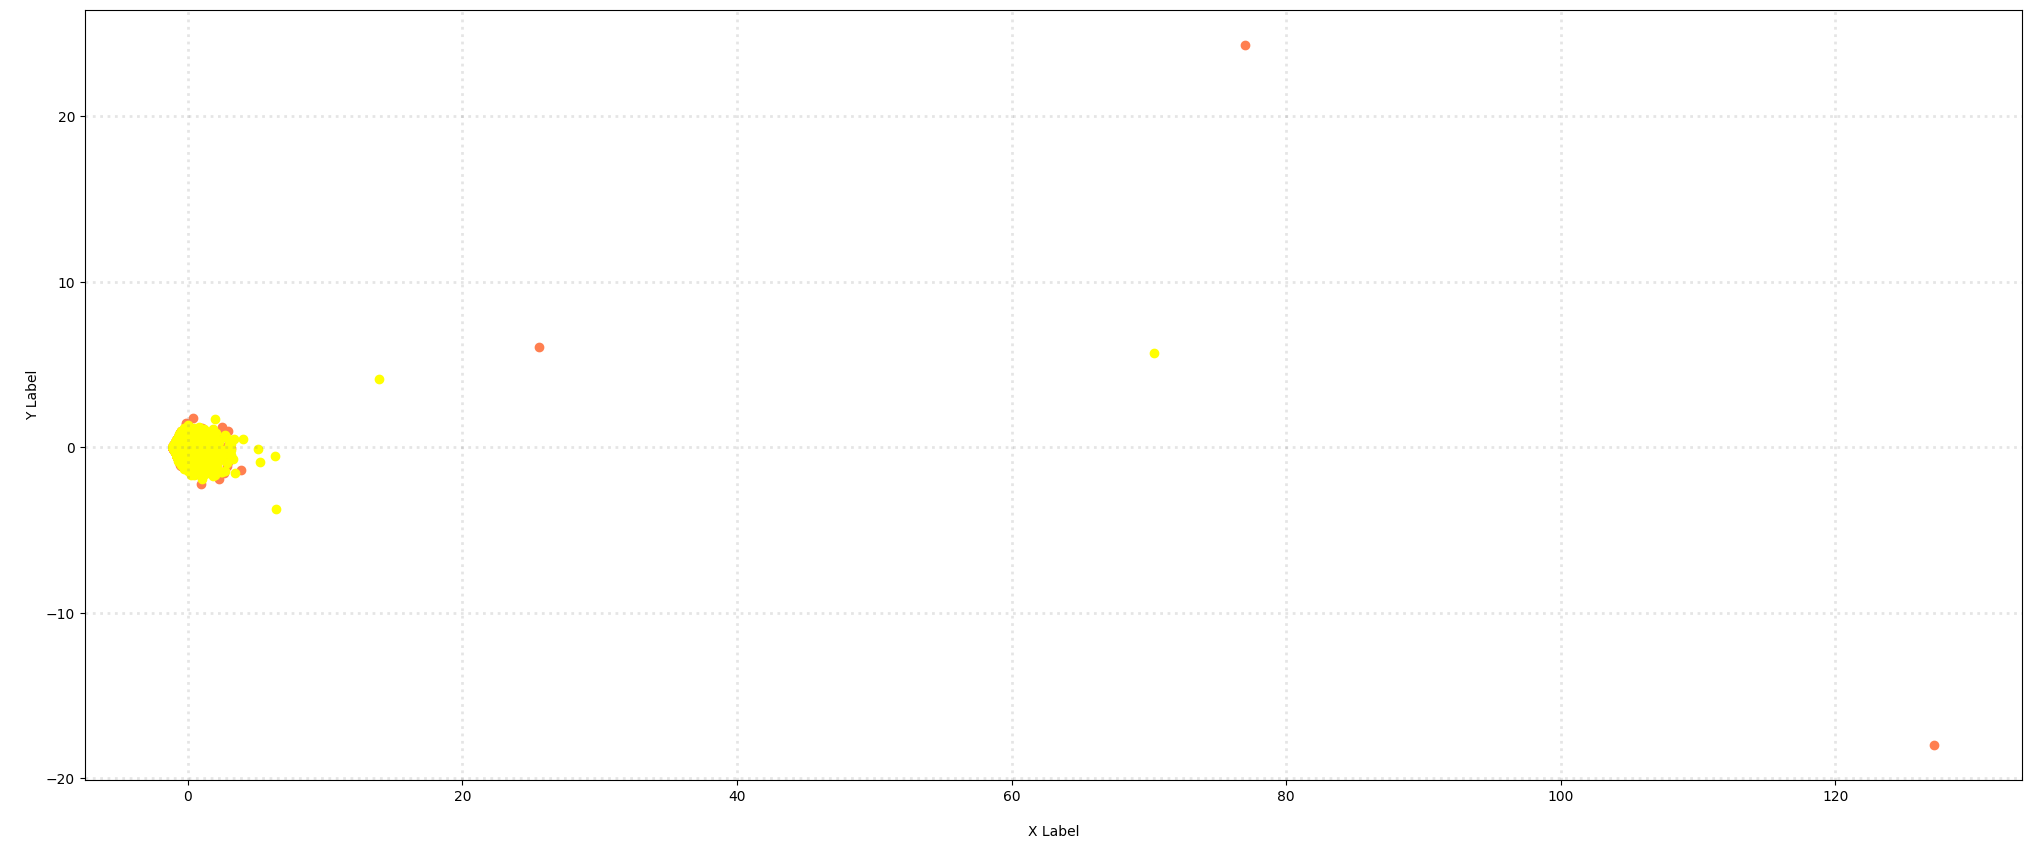

In [73]:
#2D plot
col = ['coral', 'yellow', 'black', 'm']
categories = [0, 1]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = data_reduced[data['label'] == category].T[0]
    ys = data_reduced[data['label'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

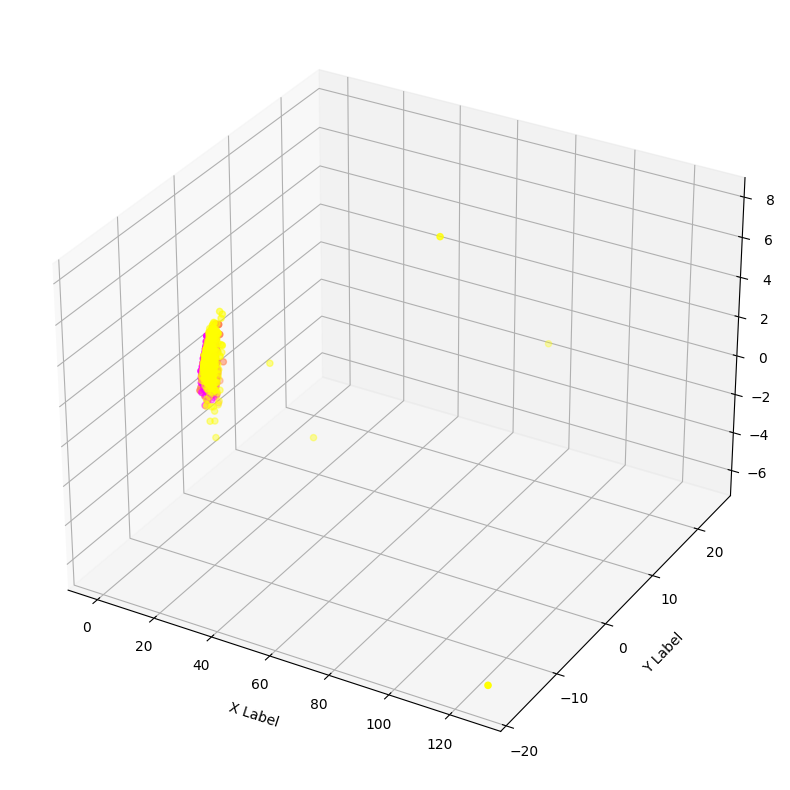

In [74]:
#3D plot
data_reduced_3d = PCA(n_components = 3).fit_transform(data_counts.toarray())

col = ['coral', 'yellow', 'magenta']
categories = ['amazon', 'imdb', 'yelp']

# plot
fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = data_reduced_3d[data['source'] == category].T[0]
    ys = data_reduced_3d[data['source'] == category].T[1]
    zs = data_reduced_3d[data['source'] == category].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### 5.5 Attribute Transformation / Aggregation - New Dataset


In [75]:
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
len(term_frequencies)

5153

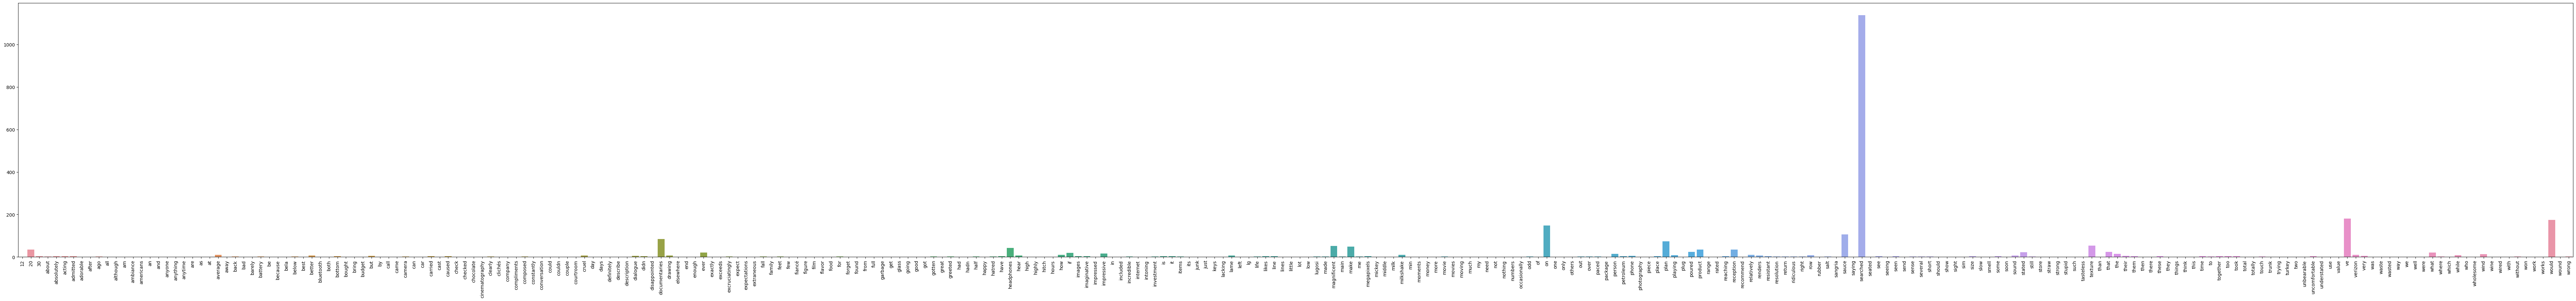

In [76]:
#plot term_frequencies
#WARNING: Here we may get strange error 'KeyError: '1928' and can be fixed by restart the jupyter kernel
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

## 5.6 Discretization and Binarization


In [77]:
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.label)
print(mlb.classes_)
data['bin_category'] = mlb.transform(data['label']).tolist()
data[0:9][['text', 'label', 'source']]

[0 1]


text  label  source
0  So there is no way for me to plug it in here i...      0  amazon
1                        Good case, Excellent value.      1  amazon
2                             Great for the jawbone.      1  amazon
3  Tied to charger for conversations lasting more...      0  amazon
4                                  The mic is great.      1  amazon
5  I have to jiggle the plug to get it to line up...      0  amazon
6  If you have several dozen or several hundred c...      0  amazon
7        If you are Razr owner...you must have this!      1  amazon
8                Needless to say, I wasted my money.      0  amazon

## 6. Data Exploration


In [83]:
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

print("Count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity- bw 1/2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity- bw 1/3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity- bw 1/1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity- bw 2/2: %(x)f" %{"x":cos_sim_count_2_2})

Count vectors:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0

### third part

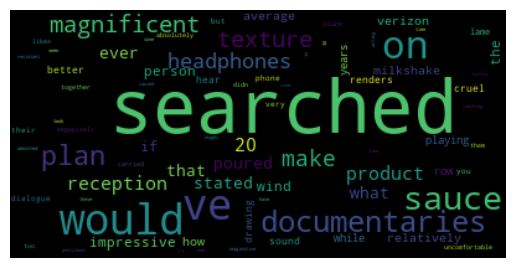

In [84]:
#we use word cloud lib to show word_freq
#need pip3 install wordcloud first
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
word_dict = {}

for i in range(len(count_vect.get_feature_names())):
    word_dict[count_vect.get_feature_names()[i]] = term_frequencies[i]
cloud = WordCloud().generate_from_frequencies(word_dict)

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 2. Generate TF-IDF features


In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data.text)

df_tfidp = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
df_tfidp

00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...    ...   
2709  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2710  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2711  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2712  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   
2713  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0   

      yum  yummy  yun  z500a  zero  zillion  zombie  zombiez  
0     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4     0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
...   ...    ...  ...    ...   ...      ...     ...      ...  
2709  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2710  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2711  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2712  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2713  0.0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[2714 rows x 5153 columns]

In [86]:
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

data['frequency'] = list(data_counts.toarray())
x = data['frequency']
y = data['label']

#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
y_label=le.fit_transform(y)
x_fre = list(x)

x_train, x_test, y_train, y_test = train_test_split(x_fre, y_label, test_size=0.3,random_state=1)
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6171779141104294


## fourth part
1. Some NLP knowledge may help us for do the things right. For exampl, we could remove stopwords or function words first to get better results.

2. Before start doing anything, it's better to observe the data and have basic concepts on what the data are for

3. It's really a tough task to illustrate the Lab1 within 3 hours. However, TA did a good job and helped us to learn the whole picture quickly. Thanks for the effort.

# Thanks for your help and patience! 